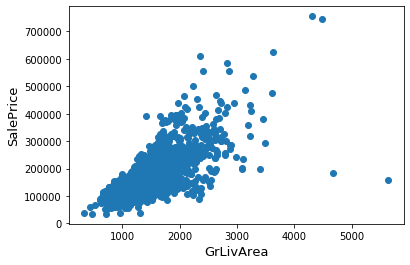

In [139]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
import warnings
from sklearn.model_selection import cross_val_score, train_test_split

from scipy.stats import skew

from scipy.special import boxcox1p

from sklearn.feature_selection import RFECV

from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score



train = pd.read_csv('data/train.csv')

test = pd.read_csv('data/test.csv')

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y= train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

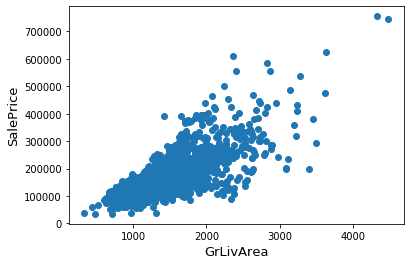

In [140]:
# remove outliers

train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y= train['SalePrice'])
plt.xlabel('GrLivArea', fontsize=13)
plt.ylabel('SalePrice', fontsize=13)
plt.show()

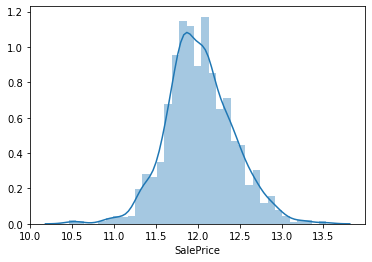

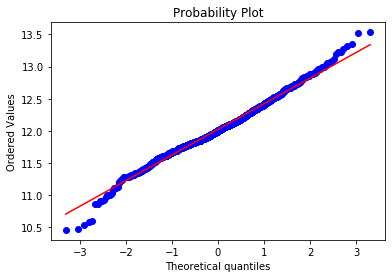

In [160]:
sns.distplot(train['SalePrice'])

# Get the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [144]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],

                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.shape

(2917, 79)

In [146]:
# drop some features to avoid multicollinearity

all_data.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'], axis=1, inplace=True)

In [149]:
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [150]:
train["SalePrice"] = np.log1p(train["SalePrice"])



numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

In [151]:
train["SalePrice"]

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1458, dtype: float64

In [154]:
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.65]

skewed_feats = skewed_feats.index
len(skewed_feats)

21

In [156]:
all_data[skewed_feats] = boxcox1p(all_data[skewed_feats], 0.15)



all_data = pd.get_dummies(all_data)



all_data = all_data.fillna(all_data.mean())

In [159]:
X_train = all_data[:train.shape[0]]

X_test = all_data[train.shape[0]:]

y = train.SalePrice





#### models selection

lasso = Lasso(alpha=0.0004)

model = lasso



### prediction

model.fit(X_train, y)



preds = np.expm1(model.predict(X_test))

solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})

solution.to_csv("full_features_lasso.csv", index = False)